# Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import math
import sklearn
import os
import statsmodels.api as sm

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Layer,Dropout,Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras.backend as K 

import mat73
import time
import datetime

from tensorflow.keras.models import load_model
import joblib

# Definir semilla
np.random.seed(42)
# Definir la fuente global
plt.rcParams['font.family'] = 'Times New Roman'
# Definir el tamaño de fuente global
plt.rc('font', size=12)

# Functions

In [ ]:
# ------------------ Create a NN -------------------------------------------
def build_model(input_dim, output_dim, num_layers, neurons_per_layer, lr, dropout_level, loss_function):
    model = Sequential()

    # Add the input layer
    model.add(Dense(neurons_per_layer, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_level))

    # Add the hidden layers
    for i in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_level))

    # Add the output layer (sin activación para tareas de regresión)
    model.add(Dense(output_dim))  # Output layer sin activación

    # Compile the model
    model.compile(loss=loss_function, optimizer=Adam(learning_rate=lr))

    return model

# Load dataset

In [ ]:
data_feature = 'data/dataset_TBCM.csv'

df = pd.read_csv(data_feature)
df= df.dropna()

In [ ]:
df= df.dropna()

variables = ['a_CT', 'a_TA', 'Ps']
covar = ['F0', 'SPL']
X2 = df[variables]
y2 = df[covar]
df

a_CT   a_TA    PL           Ps          F0        SPL
0      0.025  0.025   500   448.003175  112.643678  69.433286
1      0.025  0.025   550   501.449121  118.389262  72.672916
2      0.025  0.025   600   553.861773  122.755741  75.573783
3      0.025  0.025   650   604.359932  126.451613  78.287517
4      0.025  0.025   700   649.345934  129.610580  80.334923
...      ...    ...   ...          ...         ...        ...
80746  0.975  0.625  1800  1946.690454  259.793814  93.773302
80747  0.975  0.625  1850  1998.716791  259.411765  94.266356
80748  0.975  0.625  1900  2052.022594  260.946746  94.672622
80749  0.975  0.625  1950  2101.982549  264.467766  95.182478
80750  0.975  0.625  2000  2156.246831  272.222222  95.559064

[43102 rows x 6 columns]

In [ ]:
## scaler  dataset
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X2)

# Separating the independent variables from dependent variables
X2_train, X2_test, y2_train, y2_test=train_test_split(np.array(X),np.array(y2),test_size= 0.2)

print("Numbers of training samples: " +str(len(X2_train)))
print("Numbers of test samples: "+str(len(X2_test)))

X_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1])
X_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1])
y_test = y2_test.reshape(y2_test.shape[0],y2_test.shape[1])
y_train = y2_train.reshape(y2_train.shape[0],y2_test.shape[1])

Numbers of training samples: 34481
Numbers of test samples: 8621


# Training optimal regressors

## Neural network

In [ ]:
num_layers = 3
neurons_per_layer = 128
lr = 0.001
dropout = 0.0
loss_f = 'mse'
batch = 256
EPOCH = 200
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#modelNN = build_model(X_train.shape[1], y_train.shape[1], num_layers, neurons_per_layer, lr, dropout, loss_f)
modelNN = load_model('models/NN_BCM.h5')
history = modelNN.fit(X_train, y_train, batch_size=batch, epochs=EPOCH, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

Epoch 1/200
135/135 [==============================] - 1s 4ms/step - loss: 383.9921 - val_loss: 192.4733
Epoch 2/200
135/135 [==============================] - 0s 3ms/step - loss: 144.0225 - val_loss: 113.8423
Epoch 3/200
135/135 [==============================] - 0s 3ms/step - loss: 102.7388 - val_loss: 94.1910
Epoch 4/200
135/135 [==============================] - 0s 3ms/step - loss: 88.9017 - val_loss: 82.4574
Epoch 5/200
135/135 [==============================] - 0s 3ms/step - loss: 78.9945 - val_loss: 73.4141
Epoch 6/200
135/135 [==============================] - 0s 3ms/step - loss: 71.8166 - val_loss: 68.5204
Epoch 7/200
135/135 [==============================] - 0s 3ms/step - loss: 65.9423 - val_loss: 61.9346
Epoch 8/200
135/135 [==============================] - 0s 3ms/step - loss: 61.2838 - val_loss: 56.8630
Epoch 9/200
135/135 [==============================] - 1s 4ms/step - loss: 57.2874 - val_loss: 53.7154
Epoch 10/200
135/135 [==============================] - 0s 4ms/step 

Epoch 80/200
135/135 [==============================] - 0s 3ms/step - loss: 23.5885 - val_loss: 21.6742
Epoch 81/200
135/135 [==============================] - 0s 3ms/step - loss: 23.6328 - val_loss: 21.9541
Epoch 82/200
135/135 [==============================] - 0s 3ms/step - loss: 23.3213 - val_loss: 21.6908
Epoch 83/200
135/135 [==============================] - 0s 3ms/step - loss: 23.7683 - val_loss: 21.9127
Epoch 84/200
135/135 [==============================] - 0s 3ms/step - loss: 23.5257 - val_loss: 21.4717
Epoch 85/200
135/135 [==============================] - 0s 3ms/step - loss: 23.2380 - val_loss: 21.9138
Epoch 86/200
135/135 [==============================] - 0s 3ms/step - loss: 23.0292 - val_loss: 21.3648
Epoch 87/200
135/135 [==============================] - 0s 3ms/step - loss: 24.1433 - val_loss: 22.8157
Epoch 88/200
135/135 [==============================] - 0s 4ms/step - loss: 23.0095 - val_loss: 23.1857
Epoch 89/200
135/135 [==============================] - 0s 3ms/s

135/135 [==============================] - 0s 3ms/step - loss: 21.2704 - val_loss: 19.3168
Epoch 159/200
135/135 [==============================] - 4s 31ms/step - loss: 21.4627 - val_loss: 19.7805
Epoch 160/200
135/135 [==============================] - 0s 3ms/step - loss: 21.4479 - val_loss: 20.9652
Epoch 161/200
135/135 [==============================] - 0s 3ms/step - loss: 21.1278 - val_loss: 19.6847
Epoch 162/200
135/135 [==============================] - 4s 30ms/step - loss: 21.2177 - val_loss: 24.1696
Epoch 163/200
135/135 [==============================] - 0s 3ms/step - loss: 21.3478 - val_loss: 19.2279
Epoch 164/200
135/135 [==============================] - 4s 30ms/step - loss: 21.1744 - val_loss: 20.2526
Epoch 165/200
135/135 [==============================] - 0s 3ms/step - loss: 21.9053 - val_loss: 19.6686
Epoch 166/200
135/135 [==============================] - 0s 3ms/step - loss: 21.0179 - val_loss: 19.3321
Epoch 167/200
135/135 [==============================] - 4s 30ms/s

In [ ]:
y_pred = modelNN.predict(X_test)

results = {'F0': [], 'SPL': []}
for i in range(len(list(results.keys()))):
  results[list(results.keys())[i]] = [mean_absolute_error(y_true=np.array(y_test)[:,(i)],y_pred=y_pred[:,(i)]), mean_squared_error(y_true=np.array(y_test)[:,i],y_pred=y_pred[:,i]), mean_squared_error(y_true=np.array(y_test)[:,i],y_pred=y_pred[:,i],squared=False), r2_score(np.array(y_test)[:,i], y_pred[:,i])]
pd.DataFrame.from_dict(results, orient='index', columns=['MAE','MSE', 'RMSE', 'R2'])

270/270 [==============================] - 0s 1ms/step


MAE        MSE      RMSE        R2
F0   3.668041  33.260055  5.767153  0.993596
SPL  1.346050   4.856882  2.203833  0.948748

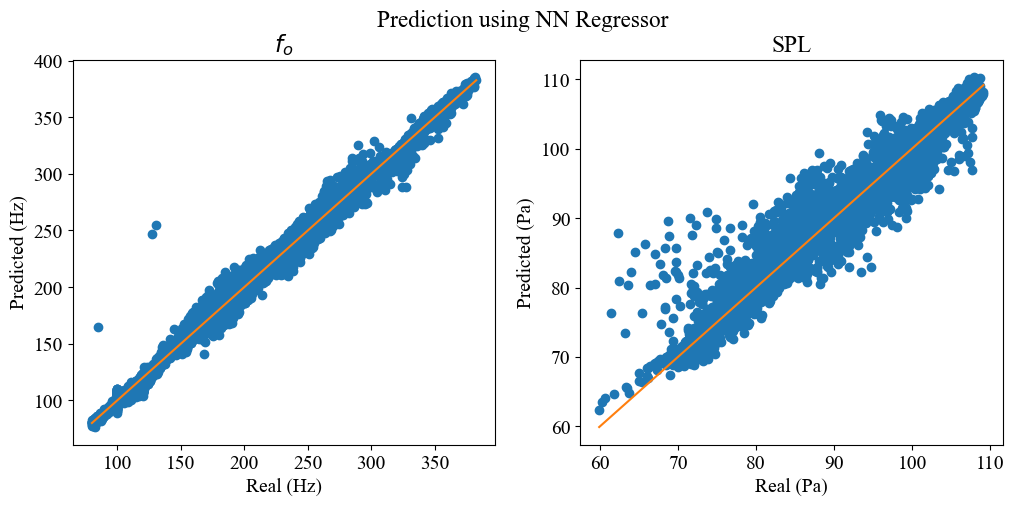

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Prediction using NN Regressor')
ax1.plot(np.array(y_test)[:,0], y_pred[:,0], 'o')
lin = [min(np.array(y_test)[:,0]), max(np.array(y_test)[:,0])]
ax1.plot(lin,lin)
ax1.set_title('$f_o$')
ax1.set_ylabel('Predicted (Hz)')
ax1.set_xlabel('Real (Hz)')
ax2.plot(np.array(y_test)[:,1], y_pred[:,1], 'o')
lin = [min(np.array(y_test)[:,1]), max(np.array(y_test)[:,1])]
ax2.plot(lin,lin)
ax2.set_ylabel('Predicted (Pa)')
ax2.set_xlabel('Real (Pa)')
ax2.set_title('SPL')
plt.show()

## Polinomial regressor

In [19]:
degree = 12

poly = PolynomialFeatures(degree=degree, include_bias=False)
modelPR = MultiOutputRegressor(estimator=LinearRegression())
modelPR.fit(poly.fit_transform(X_train), y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [20]:
y_pred = modelPR.predict(poly.fit_transform(X_test))

results = {'F0': [], 'SPL': []}
for i in range(len(list(results.keys()))):
  results[list(results.keys())[i]] = [mean_absolute_error(y_true=np.array(y_test)[:,(i)],y_pred=y_pred[:,(i)]), mean_squared_error(y_true=np.array(y_test)[:,i],y_pred=y_pred[:,i]), mean_squared_error(y_true=np.array(y_test)[:,i],y_pred=y_pred[:,i],squared=False), r2_score(np.array(y_test)[:,i], y_pred[:,i])]
pd.DataFrame.from_dict(results, orient='index', columns=['MAE','MSE', 'RMSE', 'R2'])

MAE        MSE      RMSE        R2
F0   4.566987  44.601749  6.678454  0.991412
SPL  1.274443   4.201307  2.049709  0.955666

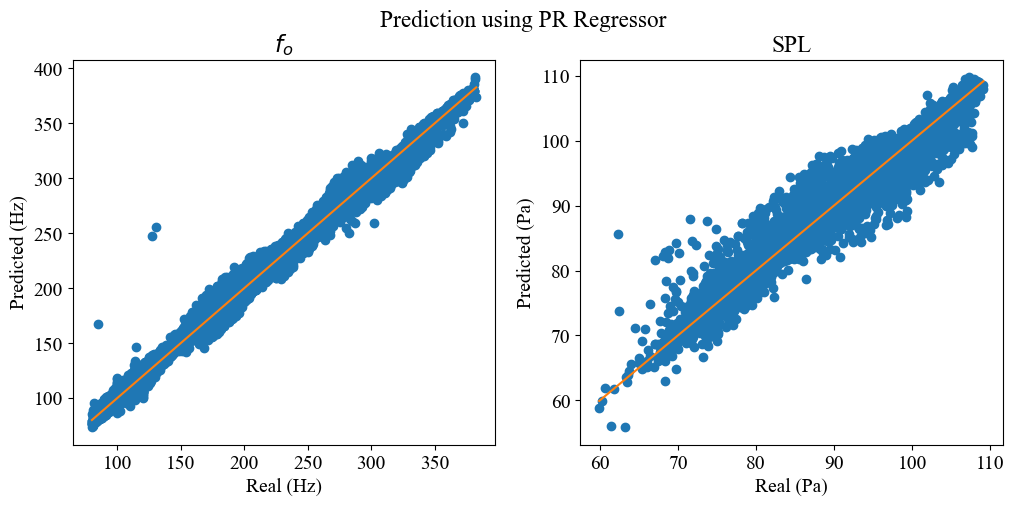

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Prediction using PR Regressor')
ax1.plot(np.array(y_test)[:,0], y_pred[:,0], 'o')
lin = [min(np.array(y_test)[:,0]), max(np.array(y_test)[:,0])]
ax1.plot(lin,lin)
ax1.set_title('$f_o$')
ax1.set_ylabel('Predicted (Hz)')
ax1.set_xlabel('Real (Hz)')
ax2.plot(np.array(y_test)[:,1], y_pred[:,1], 'o')
lin = [min(np.array(y_test)[:,1]), max(np.array(y_test)[:,1])]
ax2.plot(lin,lin)
ax2.set_ylabel('Predicted (Pa)')
ax2.set_xlabel('Real (Pa)')
ax2.set_title('SPL')
plt.show()

## Random Forest

In [22]:
depth = 40

modelRF = MultiOutputRegressor(RandomForestRegressor(max_depth=depth, random_state=0))
modelRF.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=40,
                                                     random_state=0))

In [23]:
y_pred = modelRF.predict(X_test)

results = {'F0': [], 'SPL': []}
for i in range(len(list(results.keys()))):
  results[list(results.keys())[i]] = [mean_absolute_error(y_true=np.array(y_test)[:,(i)],y_pred=y_pred[:,(i)]), mean_squared_error(y_true=np.array(y_test)[:,i],y_pred=y_pred[:,i]), mean_squared_error(y_true=np.array(y_test)[:,i],y_pred=y_pred[:,i],squared=False), r2_score(np.array(y_test)[:,i], y_pred[:,i])]
pd.DataFrame.from_dict(results, orient='index', columns=['MAE','MSE', 'RMSE', 'R2'])

MAE        MSE      RMSE        R2
F0   1.733407  18.312067  4.279260  0.996474
SPL  0.400835   1.077549  1.038051  0.988629

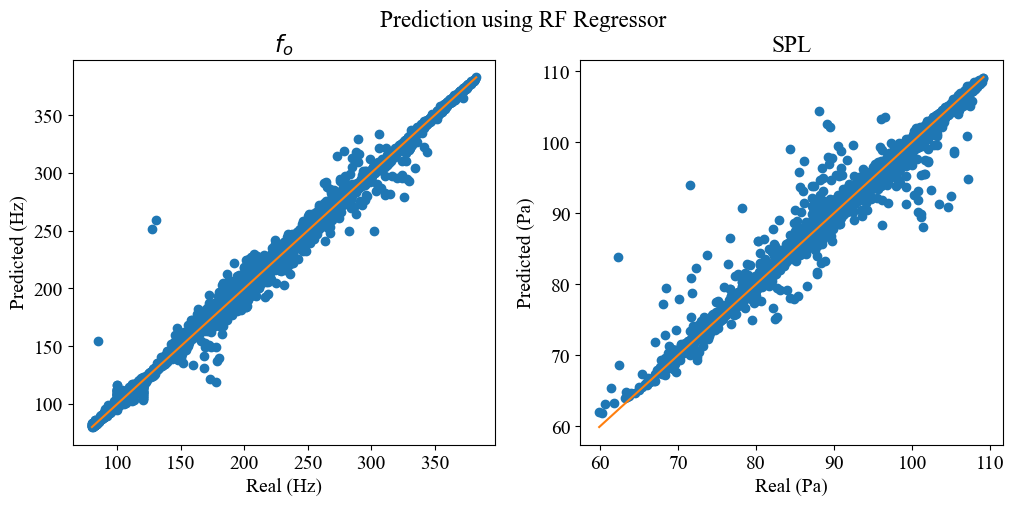

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Prediction using RF Regressor')
ax1.plot(np.array(y_test)[:,0], y_pred[:,0], 'o')
lin = [min(np.array(y_test)[:,0]), max(np.array(y_test)[:,0])]
ax1.plot(lin,lin)
ax1.set_title('$f_o$')
ax1.set_ylabel('Predicted (Hz)')
ax1.set_xlabel('Real (Hz)')
ax2.plot(np.array(y_test)[:,1], y_pred[:,1], 'o')
lin = [min(np.array(y_test)[:,1]), max(np.array(y_test)[:,1])]
ax2.plot(lin,lin)
ax2.set_ylabel('Predicted (Pa)')
ax2.set_xlabel('Real (Pa)')
ax2.set_title('SPL')
plt.show()

# Save regressors

In [29]:
import joblib


# Guardar el modelo Keras
modelNN.save('models/NN_TBCM.h5')

# Guardar el Random Forest y Polynomial Regressor
joblib.dump(modelRF, 'models/RF_TBCM.pkl', compress=5)  # Guardar el modelo de Random Forest
joblib.dump(modelPR, 'models/PR_TBCM.pkl')  # Guardar el modelo Polynomial Regressor

# Guardar el scaler
joblib.dump(x_scaler, 'models/x_scaler_TBCM.pkl')

['models/x_scaler_TBCM.pkl']

# Load regressors

In [3]:
# Cargar el modelo Keras más tarde
modelNN = load_model('models/NN_TBCM.h5')
# Cargar los modelos posteriormente
modelRF = joblib.load('models/RF_TBCM.pkl')
modelPR = joblib.load('models/PR_TBCM.pkl')
# Cargar el scaler más tarde
x_scaler = joblib.load('models/x_scaler_TBCM.pkl')

degree = 12
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Time comparison

In [13]:
# Parámetros de configuración para el testeo
sample_sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]  # Tamaños de muestra
n_repeats = 8  

# Crear un DataFrame para almacenar los tiempos
execution_times = {
    'Sample Size': [],
    'Random Forest Time': [],
    'NN Time': [],
    'Polynomial Regressor Time': []
}

In [14]:
# Loop over different sample sizes to measure prediction time
for n_samples in sample_sizes:
    rf_times, nn_times, poly_times = [], [], []

    for _ in range(n_repeats):
        # Generate test data with the current sample size
        X_test = np.random.rand(n_samples, 3)  # 3 input features
        Y_test = np.random.rand(n_samples, 2)  # 2 output targets (e.g., F0 and SPL)

        
        # Measure prediction time for Random Forest
        start_time = time.time()
        modelRF.predict(X_test)
        rf_times.append(time.time() - start_time)

        # Measure prediction time for Neural Network
        start_time = time.time()
        modelNN.predict(X_test)
        nn_times.append(time.time() - start_time)

        # Measure prediction time for Polynomial Regressor
        start_time = time.time()
        X_poly_test = poly.transform(X_test)
        modelPR.predict(X_poly_test)
        poly_times.append(time.time() - start_time)

    # Store mean execution times
    execution_times['Sample Size'].append(n_samples)
    execution_times['Random Forest Time'].append(np.mean(rf_times))
    execution_times['NN Time'].append(np.mean(nn_times))
    execution_times['Polynomial Regressor Time'].append(np.mean(poly_times))

    print(f"Sample Size: {n_samples} - RF Mean Time: {np.mean(rf_times):.4f}s, NN Mean Time: {np.mean(nn_times):.4f}s, Poly Mean Time: {np.mean(poly_times):.4f}s")

# Convert results into a DataFrame
times_df = pd.DataFrame(execution_times)

# Save results to a CSV file for further analysis
times_df.to_csv('TBCM_execution_times_comparison.csv', index=False)

1/1 [==============================] - 0s 21ms/step
Sample Size: 1 - RF Mean Time: 0.0114s, NN Mean Time: 0.0692s, Poly Mean Time: 0.0005s
1/1 [==============================] - 0s 24ms/step
Sample Size: 2 - RF Mean Time: 0.0091s, NN Mean Time: 0.0604s, Poly Mean Time: 0.0009s
1/1 [==============================] - 0s 23ms/step
Sample Size: 5 - RF Mean Time: 0.0107s, NN Mean Time: 0.0602s, Poly Mean Time: 0.0010s
1/1 [==============================] - 0s 21ms/step
Sample Size: 10 - RF Mean Time: 0.0106s, NN Mean Time: 0.0581s, Poly Mean Time: 0.0011s
1/1 [==============================] - 0s 24ms/step
Sample Size: 20 - RF Mean Time: 0.0126s, NN Mean Time: 0.0635s, Poly Mean Time: 0.0010s
2/2 [==============================] - 0s 4ms/step
Sample Size: 50 - RF Mean Time: 0.0190s, NN Mean Time: 0.0727s, Poly Mean Time: 0.0012s
4/4 [==============================] - 0s 2ms/step
Sample Size: 100 - RF Mean Time: 0.0246s, NN Mean Time: 0.0753s, Poly Mean Time: 0.0030s
7/7 [===================

6250/6250 [==============================] - 10s 2ms/step
Sample Size: 200000 - RF Mean Time: 8.3128s, NN Mean Time: 12.6423s, Poly Mean Time: 0.9685s
15625/15625 [==============================] - 25s 2ms/step
Sample Size: 500000 - RF Mean Time: 20.4369s, NN Mean Time: 31.3178s, Poly Mean Time: 2.4046s
31250/31250 [==============================] - 48s 2ms/step
Sample Size: 1000000 - RF Mean Time: 39.9334s, NN Mean Time: 60.8033s, Poly Mean Time: 4.7329s


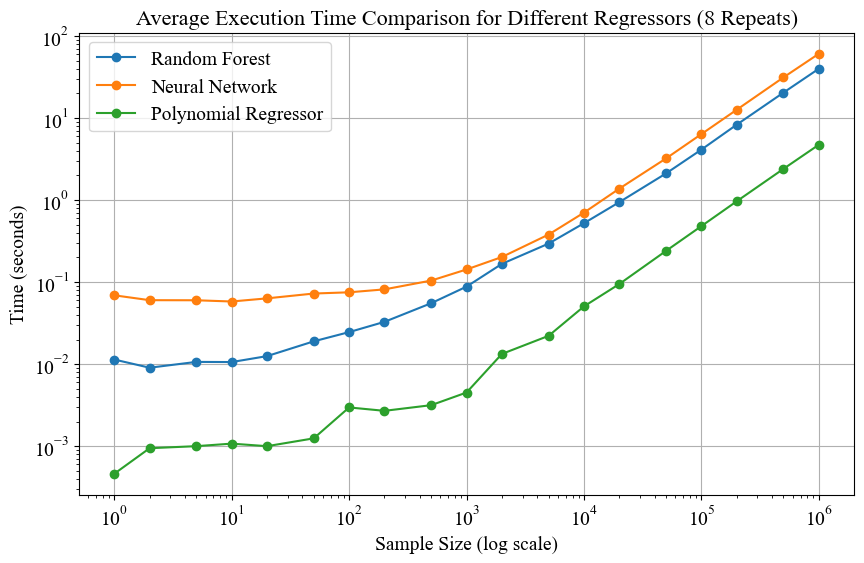

In [21]:
# Graficar los resultados con ejes logarítmicos
plt.figure(figsize=(10, 6))

# Graficar tiempos de ejecución para cada modelo
plt.plot(times_df['Sample Size'], times_df['Random Forest Time'], label='Random Forest', marker='o')
plt.plot(times_df['Sample Size'], times_df['NN Time'], label='Neural Network', marker='o')
plt.plot(times_df['Sample Size'], times_df['Polynomial Regressor Time'], label='Polynomial Regressor', marker='o')

# Configurar el eje x como logarítmico
plt.xscale('log')
plt.yscale('log')

# Etiquetas y título
plt.xlabel('Sample Size (log scale)', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Average Execution Time Comparison for Different Regressors (8 Repeats)', fontsize=16)

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)

# Show the plot
output_filename = 'Figs/TBCM_times_regressor_log.svg'
plt.savefig(output_filename, format='svg')
plt.show()

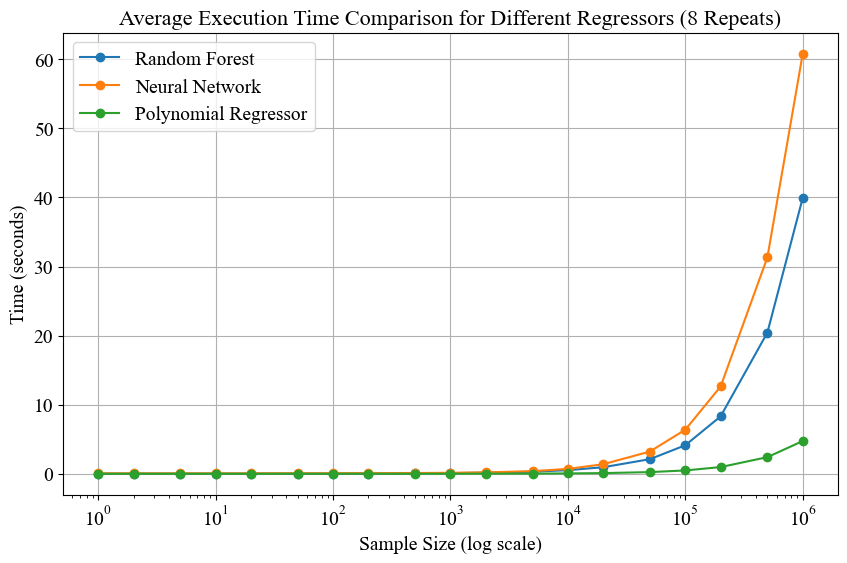

In [22]:
# Graficar los resultados con ejes logarítmicos
plt.figure(figsize=(10, 6))

# Graficar tiempos de ejecución para cada modelo
plt.plot(times_df['Sample Size'], times_df['Random Forest Time'], label='Random Forest', marker='o')
plt.plot(times_df['Sample Size'], times_df['NN Time'], label='Neural Network', marker='o')
plt.plot(times_df['Sample Size'], times_df['Polynomial Regressor Time'], label='Polynomial Regressor', marker='o')

# Configurar el eje x como logarítmico
plt.xscale('log')
#plt.yscale('log')

# Etiquetas y título
plt.xlabel('Sample Size (log scale)', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.title('Average Execution Time Comparison for Different Regressors (8 Repeats)', fontsize=16)

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)

# Show the plot
output_filename = 'Figs/TBCM_times_regressor.svg'
plt.savefig(output_filename, format='svg')
plt.show()

# Heatmap comparison

# Plots

In [8]:
from scipy.interpolate import griddata

In [9]:
# dataset2
df2= df[df['PL']==1000]

In [10]:
PL = np.mean(df2['Ps'].unique())
ps = x_scaler.transform([[0,0,PL]])[0,2]
ps

0.35777176262464744

In [11]:
df2 = df2.sort_values(by=['a_TA', 'a_CT'])
df2

a_CT   a_TA    PL           Ps          F0        SPL
10     0.025  0.025  1000   944.828596  144.000000  90.859118
34329  0.050  0.025  1000   960.027672  163.940520  92.012971
39745  0.075  0.025  1000   963.110009  178.904665  93.573429
45627  0.100  0.025  1000   969.104102  191.323210  93.178706
51739  0.125  0.025  1000   974.287256  200.911162  93.532179
...      ...    ...   ...          ...         ...        ...
32255  0.900  1.000  1000  1098.438763  258.272328  76.366701
32298  0.925  1.000  1000  1099.026243  260.946746  75.594487
32339  0.950  1.000  1000  1099.749395  263.677130  74.806801
32380  0.975  1.000  1000  1100.366695  265.662651  74.091555
32485  1.000  1.000  1000  1101.138818  268.085106  73.349863

[1519 rows x 6 columns]

In [12]:
variables = ['a_CT', 'a_TA', 'Ps']
covar = ['F0', 'SPL']

X = df2[variables]
X_norm = x_scaler.transform(X)

y = np.array(df2[covar])

In [14]:
# Valores únicos de a_CT y a_TA
ct = df2['a_CT'].unique()
ta = df2['a_TA'].unique()


# Crear la malla de valores
X, Y = np.meshgrid(ct, ta)

# Preparar los datos de entrada para predicción
n_rows, n_cols = X.shape
input_data = np.zeros((n_rows * n_cols, 3))
input_data[:, 0] = X.flatten()
input_data[:, 1] = Y.flatten()
input_data[:, 2] = ps  # Ps constante

# Crear la malla de puntos existentes en el DataFrame
points = df2[['a_CT', 'a_TA']].values
values_f0 = df2['F0'].values
values_spl = df2['SPL'].values

# Realizar interpolación sobre la malla
Z1_l = griddata(points, values_f0, (X, Y), method='linear')
Z2_l = griddata(points, values_spl, (X, Y), method='linear')


50/50 [==============================] - 0s 1ms/step


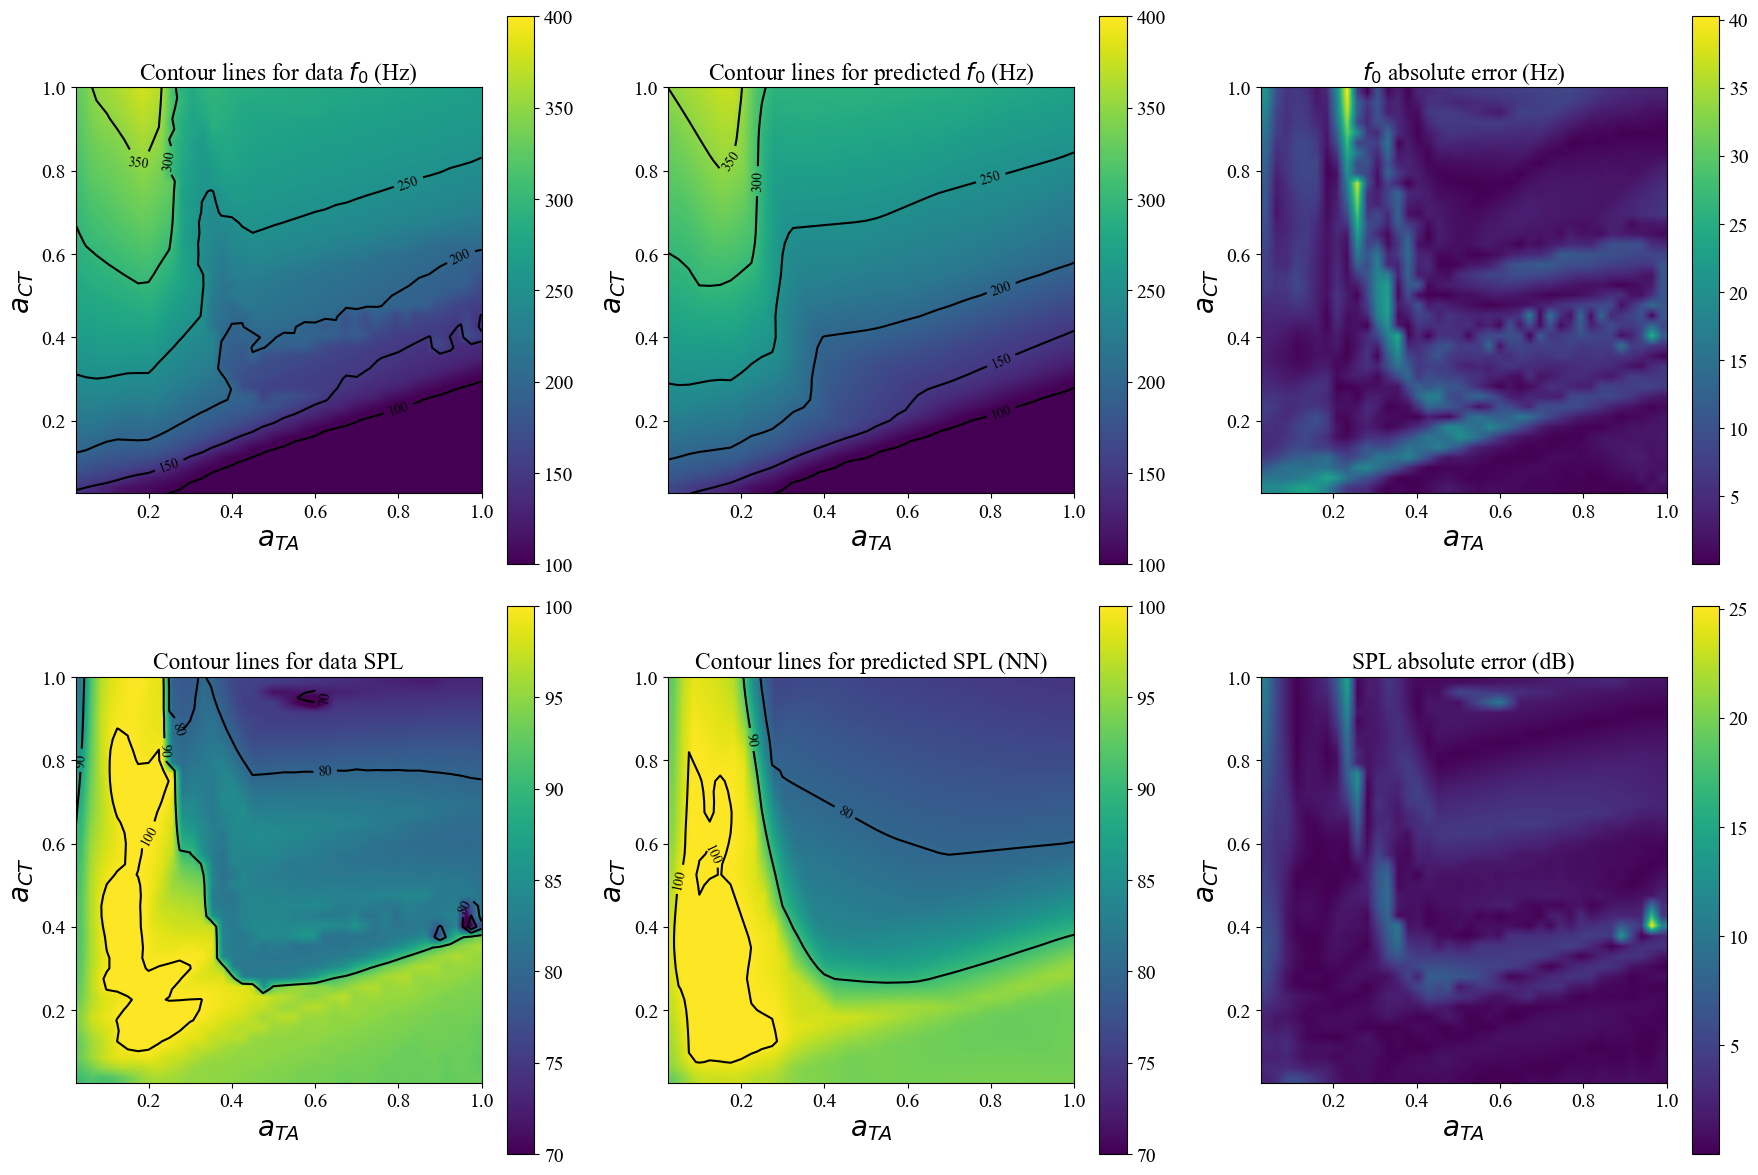

In [25]:
reg = 'NN'

# Predict outputs using the random forest model
predictions = modelNN.predict(input_data)
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))

# Definir niveles específicos para los contornos
levels_f0 = [100, 150, 200, 250, 300, 350]  # Para F0
levels_spl = np.arange(70, 105, 10)  # Para SPL (70, 75, 80,..., 100)

# Graficar los resultados
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Contour lines for data F0
im1 = axs[0, 0].imshow(Z1_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS1 = axs[0, 0].contour(Y, X, Z1_l, levels=levels_f0, colors='k')
axs[0, 0].clabel(CS1, inline=True, fontsize=10)
axs[0, 0].set_title('Contour lines for data $f_0$ (Hz)')
axs[0, 0].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 0].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im1, ax=axs[0, 0])  # Barra de color para subplot 1

# Gráfico 2: Contour lines for predicted F0 (NN)
im2 = axs[0, 1].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 1].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 1].clabel(CS2, inline=True, fontsize=10)
axs[0, 1].set_title('Contour lines for predicted $f_0$ (Hz)')
axs[0, 1].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 1].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im2, ax=axs[0, 1])  # Barra de color para subplot 2

# Gráfico 3: Error absoluto entre valores de F0
error_f0 = np.abs(Z1_l.T - Z1.T)  # Error absoluto
im3 = axs[0, 2].imshow(error_f0, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]))
axs[0, 2].set_title('$f_0$ absolute error (Hz)')
axs[0, 2].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im3, ax=axs[0, 2])  # Barra de color para error F0

# Gráfico 4: Contour lines for data SPL
im4 = axs[1, 0].imshow(Z2_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS4 = axs[1, 0].contour(Y, X, Z2_l, levels=levels_spl, colors='k')
axs[1, 0].clabel(CS4, inline=True, fontsize=10)
axs[1, 0].set_title('Contour lines for data SPL')
axs[1, 0].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 0].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im4, ax=axs[1, 0])  # Barra de color para subplot 3

# Gráfico 5: Contour lines for predicted SPL (NN)
im5 = axs[1, 1].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 1].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 1].clabel(CS5, inline=True, fontsize=10)
axs[1, 1].set_title('Contour lines for predicted SPL (NN)')
axs[1, 1].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 1].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im5, ax=axs[1, 1])  # Barra de color para subplot 4

# Gráfico 6: Error absoluto entre valores de SPL
error_spl = np.abs(Z2_l.T - Z2.T)  # Error absoluto
im6 = axs[1, 2].imshow(error_spl, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]))
axs[1, 2].set_title('SPL absolute error (dB)')
axs[1, 2].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im6, ax=axs[1, 2])  # Barra de color para error SPL

# Ajustar espacios entre subplots
plt.tight_layout()
    
output_filename = 'Figs/heatmap_TBCM_'+reg+'.svg'
plt.savefig(output_filename, format='svg')
plt.show()

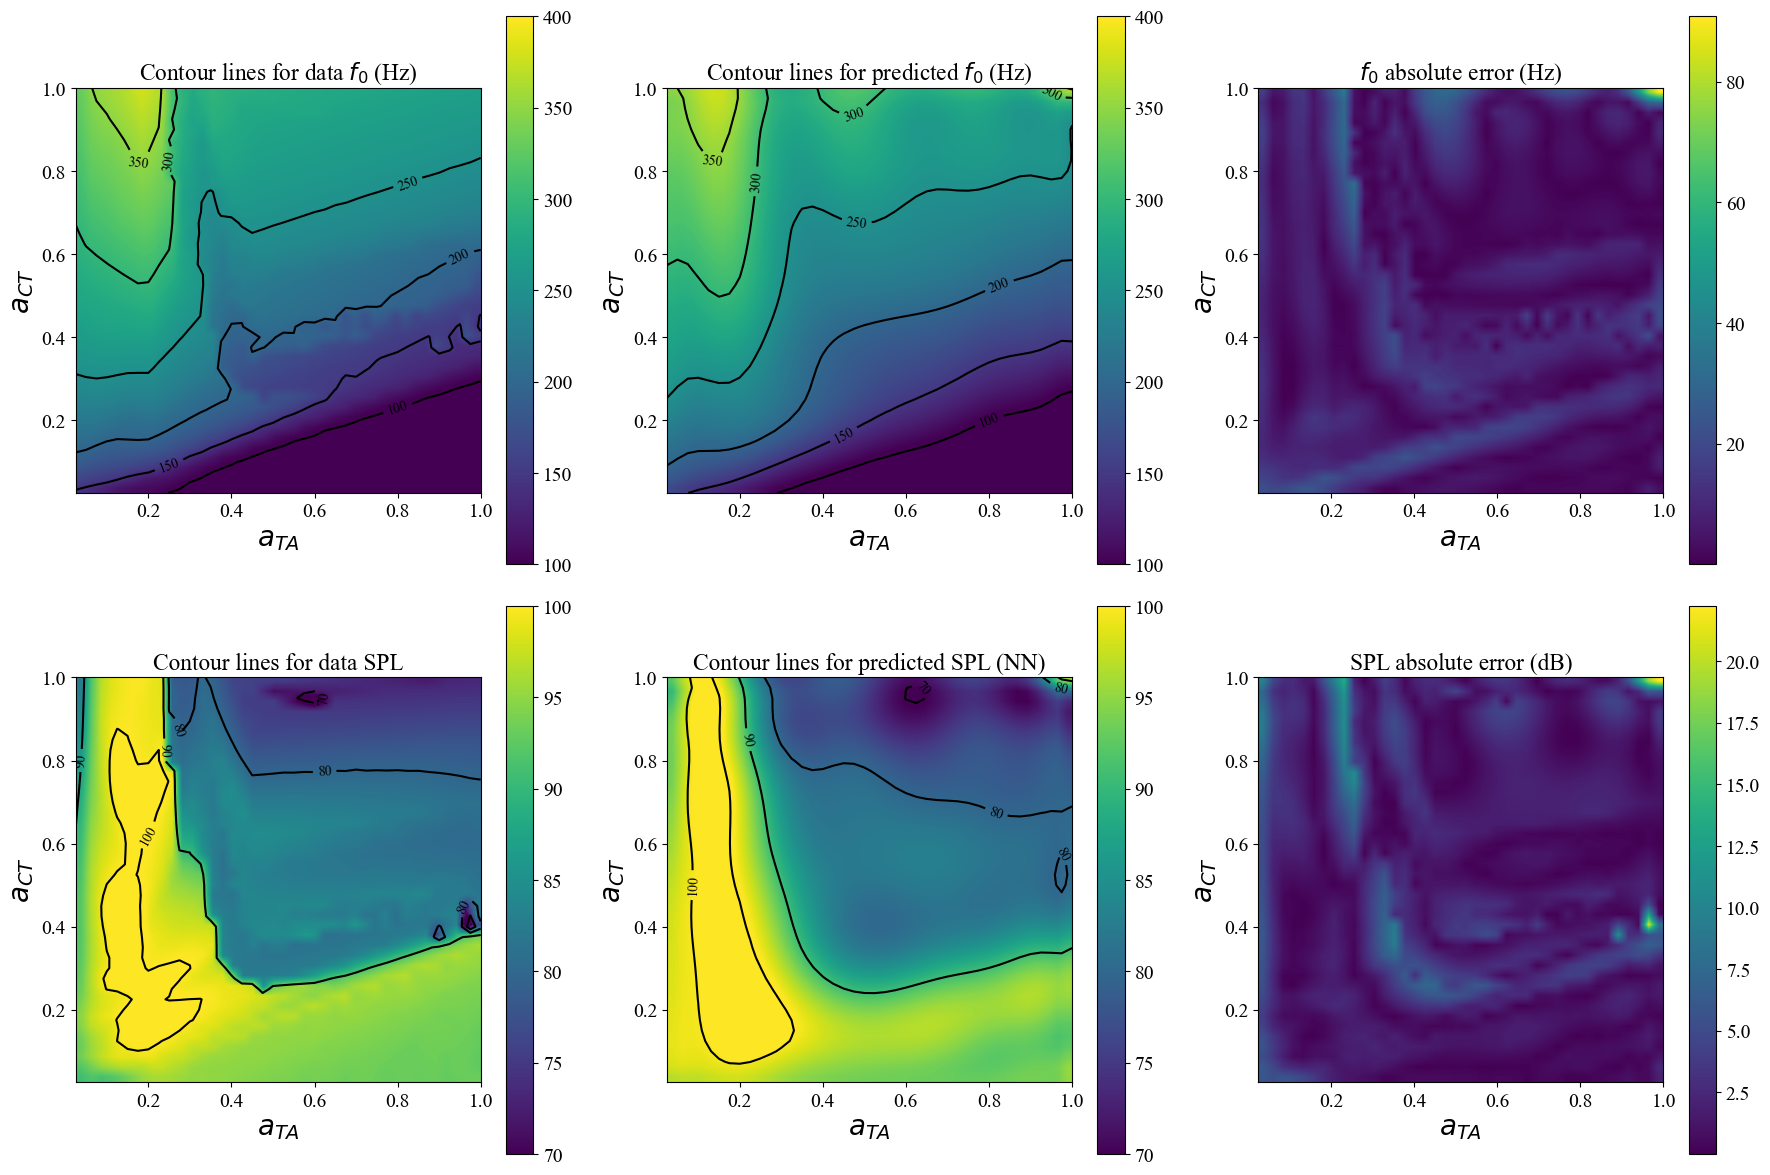

In [26]:
reg = 'PR'

# Predict outputs using the polynomial model
predictions = modelPR.predict(poly.fit_transform(input_data))
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))

# Definir niveles específicos para los contornos
levels_f0 = [100, 150, 200, 250, 300, 350]  # Para F0
levels_spl = np.arange(70, 105, 10)  # Para SPL (70, 75, 80,..., 100)

# Graficar los resultados
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Contour lines for data F0
im1 = axs[0, 0].imshow(Z1_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS1 = axs[0, 0].contour(Y, X, Z1_l, levels=levels_f0, colors='k')
axs[0, 0].clabel(CS1, inline=True, fontsize=10)
axs[0, 0].set_title('Contour lines for data $f_0$ (Hz)')
axs[0, 0].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 0].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im1, ax=axs[0, 0])  # Barra de color para subplot 1

# Gráfico 2: Contour lines for predicted F0 (NN)
im2 = axs[0, 1].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 1].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 1].clabel(CS2, inline=True, fontsize=10)
axs[0, 1].set_title('Contour lines for predicted $f_0$ (Hz)')
axs[0, 1].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 1].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im2, ax=axs[0, 1])  # Barra de color para subplot 2

# Gráfico 3: Error absoluto entre valores de F0
error_f0 = np.abs(Z1_l.T - Z1.T)  # Error absoluto
im3 = axs[0, 2].imshow(error_f0, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]))
axs[0, 2].set_title('$f_0$ absolute error (Hz)')
axs[0, 2].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im3, ax=axs[0, 2])  # Barra de color para error F0

# Gráfico 4: Contour lines for data SPL
im4 = axs[1, 0].imshow(Z2_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS4 = axs[1, 0].contour(Y, X, Z2_l, levels=levels_spl, colors='k')
axs[1, 0].clabel(CS4, inline=True, fontsize=10)
axs[1, 0].set_title('Contour lines for data SPL')
axs[1, 0].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 0].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im4, ax=axs[1, 0])  # Barra de color para subplot 3

# Gráfico 5: Contour lines for predicted SPL (NN)
im5 = axs[1, 1].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 1].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 1].clabel(CS5, inline=True, fontsize=10)
axs[1, 1].set_title('Contour lines for predicted SPL (NN)')
axs[1, 1].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 1].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im5, ax=axs[1, 1])  # Barra de color para subplot 4

# Gráfico 6: Error absoluto entre valores de SPL
error_spl = np.abs(Z2_l.T - Z2.T)  # Error absoluto
im6 = axs[1, 2].imshow(error_spl, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]))
axs[1, 2].set_title('SPL absolute error (dB)')
axs[1, 2].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im6, ax=axs[1, 2])  # Barra de color para error SPL

# Ajustar espacios entre subplots
plt.tight_layout()   
    
output_filename = 'Figs/heatmap_TBCM_'+reg+'.svg'
plt.savefig(output_filename, format='svg')
plt.show()

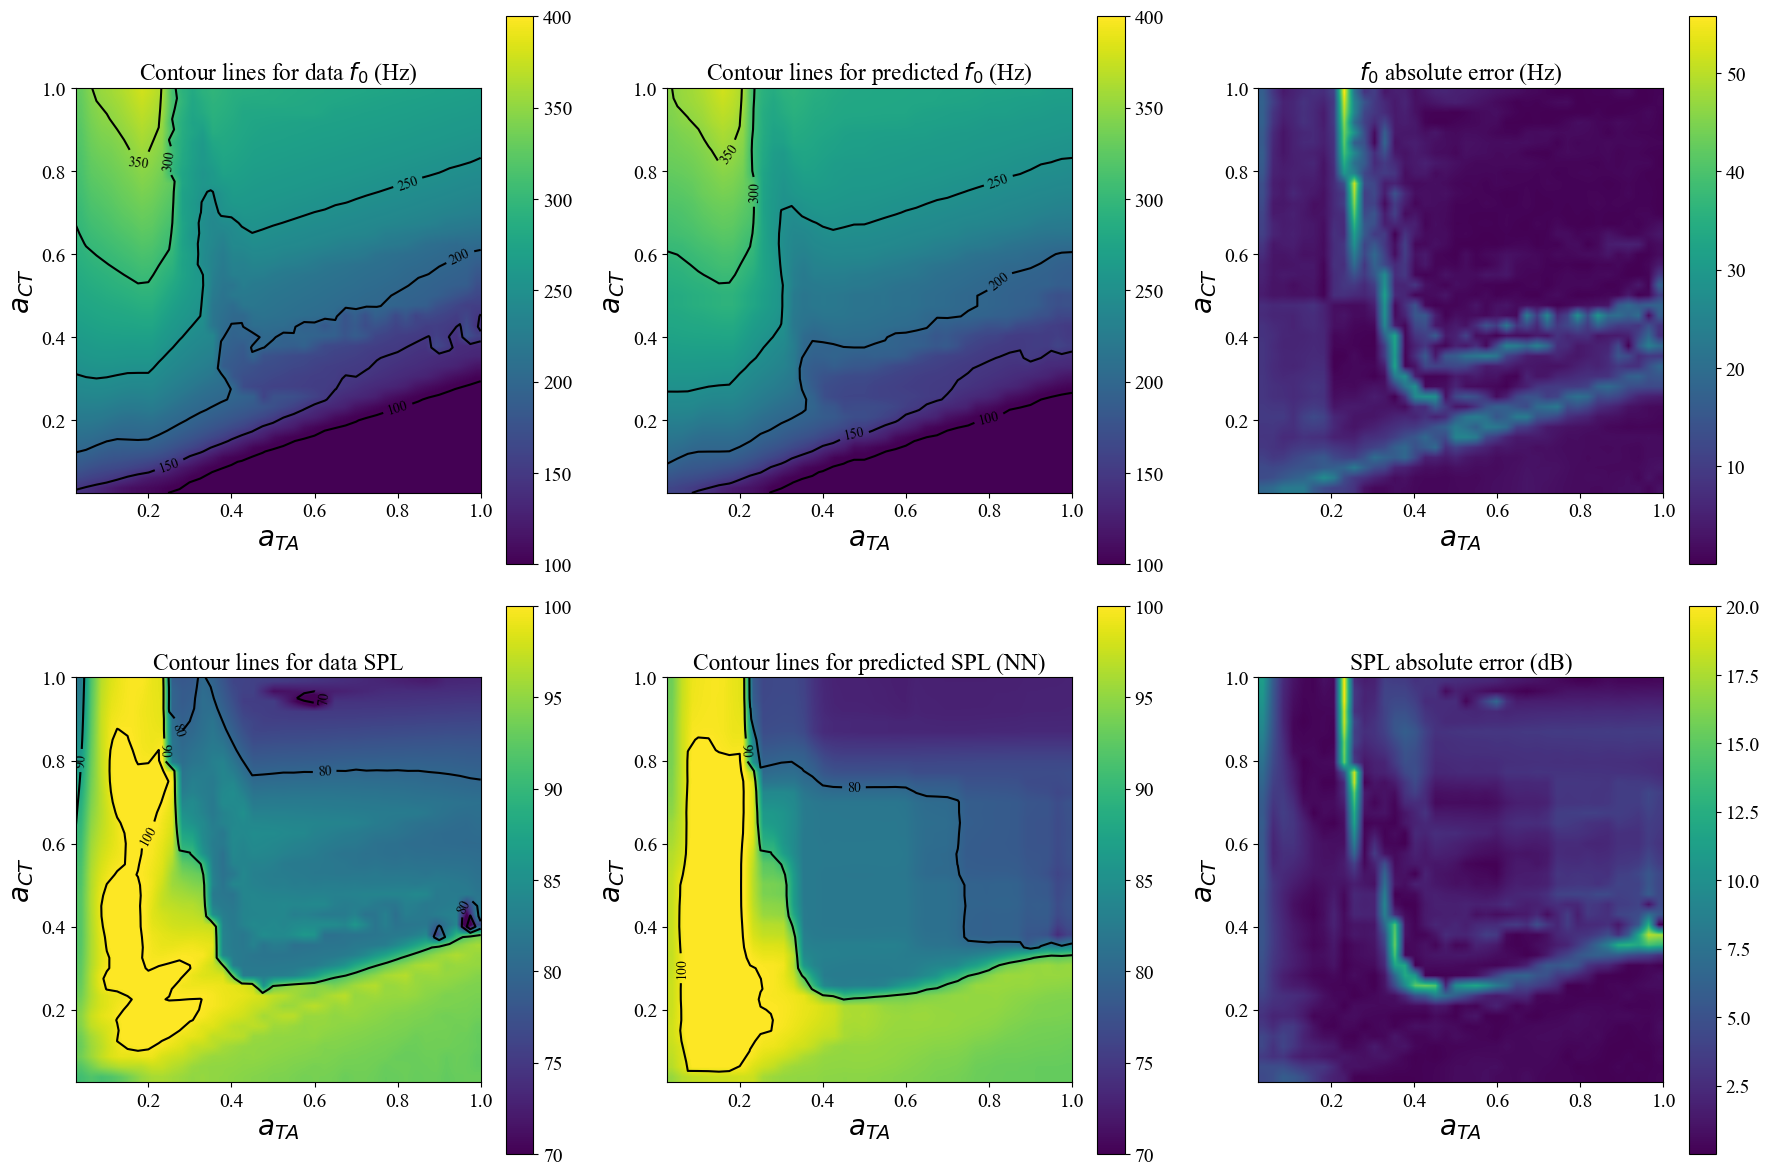

In [27]:
reg = 'RF'

# Predict outputs using the random forest model
predictions = modelRF.predict(input_data)
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))

# Definir niveles específicos para los contornos
levels_f0 = [100, 150, 200, 250, 300, 350]  # Para F0
levels_spl = np.arange(70, 105, 10)  # Para SPL (70, 75, 80,..., 100)

# Graficar los resultados
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Contour lines for data F0
im1 = axs[0, 0].imshow(Z1_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS1 = axs[0, 0].contour(Y, X, Z1_l, levels=levels_f0, colors='k')
axs[0, 0].clabel(CS1, inline=True, fontsize=10)
axs[0, 0].set_title('Contour lines for data $f_0$ (Hz)')
axs[0, 0].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 0].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im1, ax=axs[0, 0])  # Barra de color para subplot 1

# Gráfico 2: Contour lines for predicted F0 (NN)
im2 = axs[0, 1].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 1].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 1].clabel(CS2, inline=True, fontsize=10)
axs[0, 1].set_title('Contour lines for predicted $f_0$ (Hz)')
axs[0, 1].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 1].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im2, ax=axs[0, 1])  # Barra de color para subplot 2

# Gráfico 3: Error absoluto entre valores de F0
error_f0 = np.abs(Z1_l.T - Z1.T)  # Error absoluto
im3 = axs[0, 2].imshow(error_f0, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]))
axs[0, 2].set_title('$f_0$ absolute error (Hz)')
axs[0, 2].set_xlabel('$a_{TA}$', fontsize=20)
axs[0, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im3, ax=axs[0, 2])  # Barra de color para error F0

# Gráfico 4: Contour lines for data SPL
im4 = axs[1, 0].imshow(Z2_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS4 = axs[1, 0].contour(Y, X, Z2_l, levels=levels_spl, colors='k')
axs[1, 0].clabel(CS4, inline=True, fontsize=10)
axs[1, 0].set_title('Contour lines for data SPL')
axs[1, 0].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 0].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im4, ax=axs[1, 0])  # Barra de color para subplot 3

# Gráfico 5: Contour lines for predicted SPL (NN)
im5 = axs[1, 1].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 1].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 1].clabel(CS5, inline=True, fontsize=10)
axs[1, 1].set_title('Contour lines for predicted SPL (NN)')
axs[1, 1].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 1].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im5, ax=axs[1, 1])  # Barra de color para subplot 4

# Gráfico 6: Error absoluto entre valores de SPL
error_spl = np.abs(Z2_l.T - Z2.T)  # Error absoluto
im6 = axs[1, 2].imshow(error_spl, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]))
axs[1, 2].set_title('SPL absolute error (dB)')
axs[1, 2].set_xlabel('$a_{TA}$', fontsize=20)
axs[1, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im6, ax=axs[1, 2])  # Barra de color para error SPL

# Ajustar espacios entre subplots
plt.tight_layout()
    
output_filename = 'Figs/heatmap_TBCM_'+reg+'.svg'
plt.savefig(output_filename, format='svg')
plt.show()

50/50 [==============================] - 0s 1ms/step


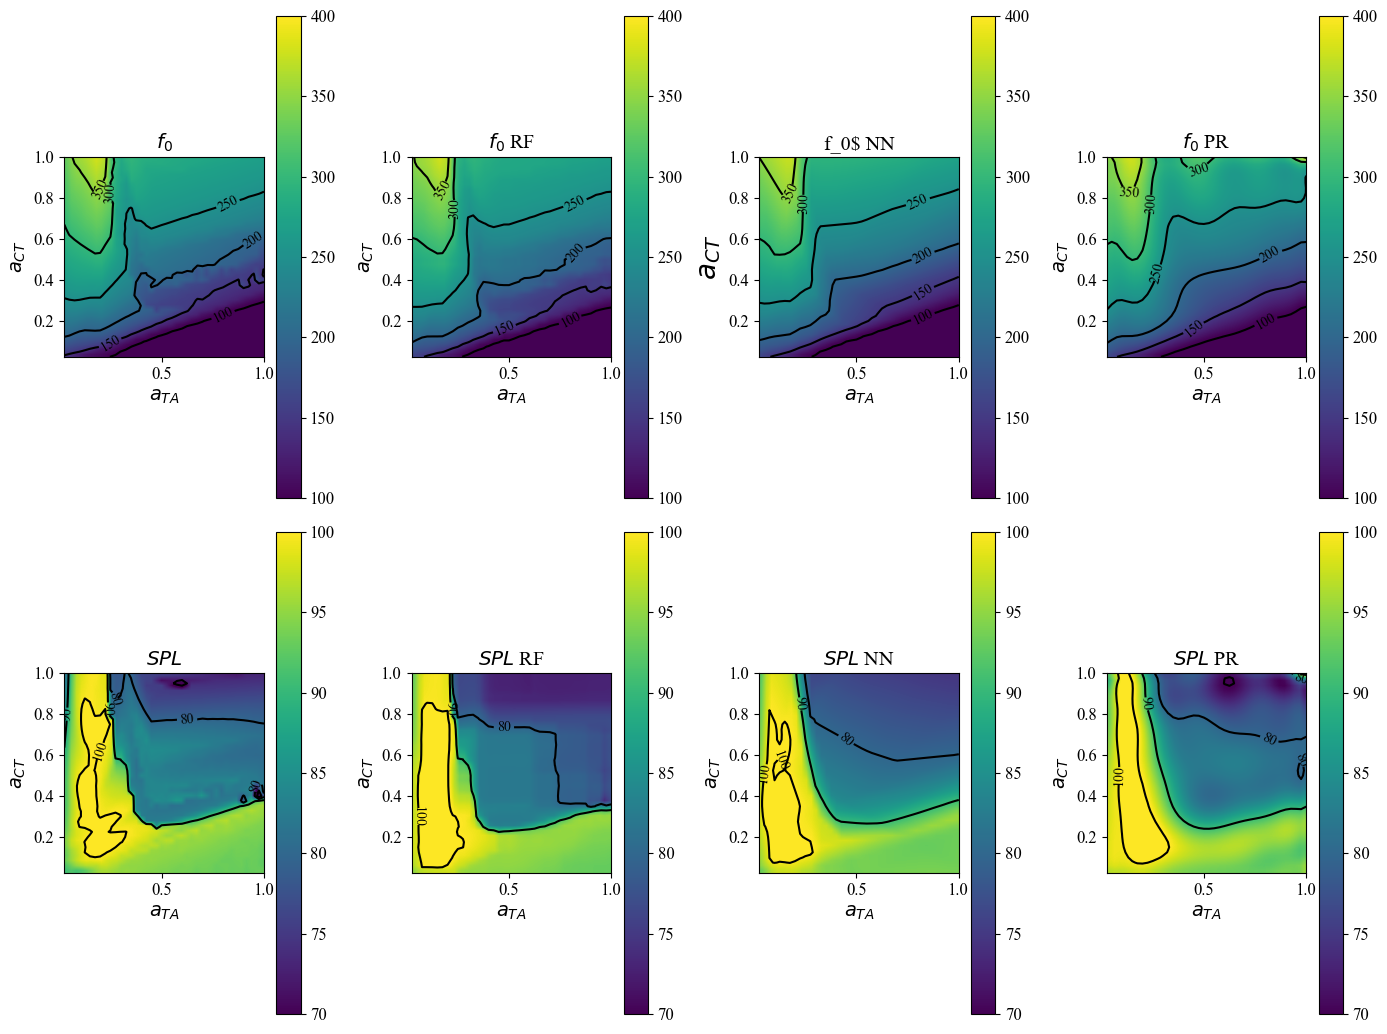

In [19]:
# Definir niveles específicos para los contornos
levels_f0 = [100, 150, 200, 250, 300, 350]  # Para F0
levels_spl = np.arange(70, 105, 10)  # Para SPL (70, 75, 80,..., 100)

# Graficar los resultados
fig, axs = plt.subplots(2, 4, figsize=(14, 10.5))

# Gráficos Dataset
# fo
im1 = axs[0, 0].imshow(Z1_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS1 = axs[0, 0].contour(Y, X, Z1_l, levels=levels_f0, colors='k')
axs[0, 0].clabel(CS1, inline=True, fontsize=10)
axs[0, 0].set_title('$f_0$')
axs[0, 0].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 0].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im1, ax=axs[0, 0])  # Barra de color
# SPL
im4 = axs[1, 0].imshow(Z2_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS4 = axs[1, 0].contour(Y, X, Z2_l, levels=levels_spl, colors='k')
axs[1, 0].clabel(CS4, inline=True, fontsize=10)
axs[1, 0].set_title('$SPL$')
axs[1, 0].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 0].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im4, ax=axs[1, 0])  # Barra de color

# Gráficos RF
reg = 'RF'
# Predict outputs using the RF model
predictions = modelRF.predict(input_data)
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))
# fo
im2 = axs[0, 1].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 1].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 1].clabel(CS2, inline=True, fontsize=10)
axs[0, 1].set_title('$f_0$ '+reg)
axs[0, 1].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 1].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im2, ax=axs[0, 1])  # Barra de color
# SPL
im5 = axs[1, 1].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 1].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 1].clabel(CS5, inline=True, fontsize=10)
axs[1, 1].set_title('$SPL$ '+reg)
axs[1, 1].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 1].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im5, ax=axs[1, 1])  # Barra de color

# Gráficos NN
reg = 'NN'
# Predict outputs using the NN model
predictions = modelNN.predict(input_data)
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))
# fo
im2 = axs[0, 2].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 2].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 2].clabel(CS2, inline=True, fontsize=10)
axs[0, 2].set_title('f_0$ '+reg)
axs[0, 2].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 2].set_ylabel('$a_{CT}$', fontsize=20)
plt.colorbar(im2, ax=axs[0, 2])  # Barra de color
# SPL
im5 = axs[1, 2].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 2].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 2].clabel(CS5, inline=True, fontsize=10)
axs[1, 2].set_title('$SPL$ '+reg)
axs[1, 2].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 2].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im5, ax=axs[1, 2])  # Barra de color

# Gráficos PR
reg = 'PR'
# Predict outputs using the polynomial model
predictions = modelPR.predict(poly.fit_transform(input_data))
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))
# fo
im2 = axs[0, 3].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 3].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 3].clabel(CS2, inline=True, fontsize=10)
axs[0, 3].set_title('$f_0$ '+reg)
axs[0, 3].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 3].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im2, ax=axs[0, 3])  # Barra de color
# SPL
im5 = axs[1, 3].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 3].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 3].clabel(CS5, inline=True, fontsize=10)
axs[1, 3].set_title('$SPL$ '+reg)
axs[1, 3].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 3].set_ylabel('$a_{CT}$', fontsize=14)
plt.colorbar(im5, ax=axs[1, 3])  # Barra de color

# Ajustar espacios entre subplots
plt.tight_layout()    
    
output_filename = 'Figs/heatmap_TBCM.svg'
plt.savefig(output_filename, format='svg')
plt.show()

50/50 [==============================] - 0s 2ms/step


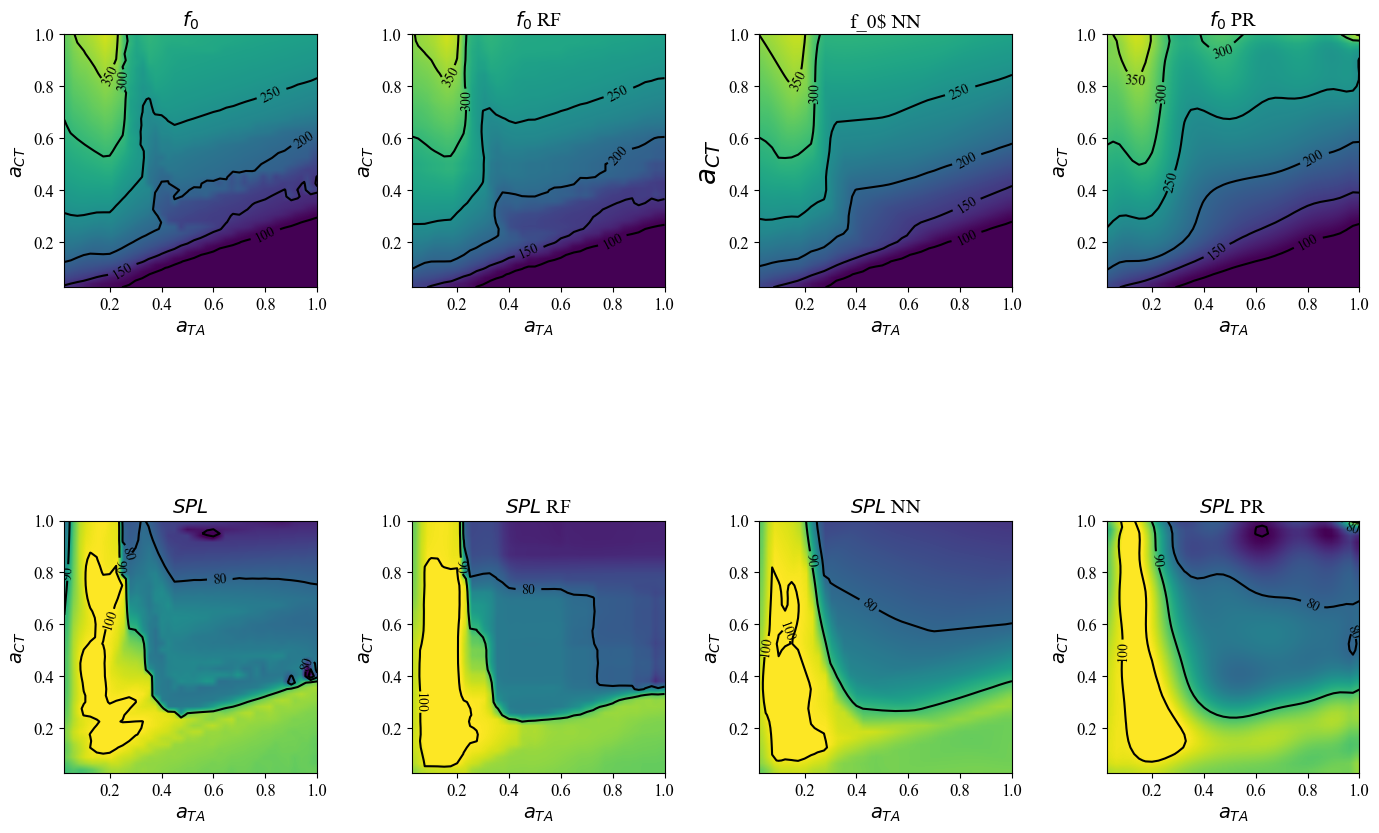

In [20]:
# Definir niveles específicos para los contornos
levels_f0 = [100, 150, 200, 250, 300, 350]  # Para F0
levels_spl = np.arange(70, 105, 10)  # Para SPL (70, 75, 80,..., 100)

# Graficar los resultados
fig, axs = plt.subplots(2, 4, figsize=(14, 10.5))

# Gráficos Dataset
# fo
im1 = axs[0, 0].imshow(Z1_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS1 = axs[0, 0].contour(Y, X, Z1_l, levels=levels_f0, colors='k')
axs[0, 0].clabel(CS1, inline=True, fontsize=10)
axs[0, 0].set_title('$f_0$')
axs[0, 0].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 0].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im1, ax=axs[0, 0])  # Barra de color
# SPL
im4 = axs[1, 0].imshow(Z2_l.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS4 = axs[1, 0].contour(Y, X, Z2_l, levels=levels_spl, colors='k')
axs[1, 0].clabel(CS4, inline=True, fontsize=10)
axs[1, 0].set_title('$SPL$')
axs[1, 0].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 0].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im4, ax=axs[1, 0])  # Barra de color

# Gráficos RF
reg = 'RF'
# Predict outputs using the RF model
predictions = modelRF.predict(input_data)
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))
# fo
im2 = axs[0, 1].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 1].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 1].clabel(CS2, inline=True, fontsize=10)
axs[0, 1].set_title('$f_0$ '+reg)
axs[0, 1].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 1].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im2, ax=axs[0, 1])  # Barra de color
# SPL
im5 = axs[1, 1].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 1].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 1].clabel(CS5, inline=True, fontsize=10)
axs[1, 1].set_title('$SPL$ '+reg)
axs[1, 1].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 1].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im5, ax=axs[1, 1])  # Barra de color

# Gráficos NN
reg = 'NN'
# Predict outputs using the NN model
predictions = modelNN.predict(input_data)
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))
# fo
im2 = axs[0, 2].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 2].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 2].clabel(CS2, inline=True, fontsize=10)
axs[0, 2].set_title('f_0$ '+reg)
axs[0, 2].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 2].set_ylabel('$a_{CT}$', fontsize=20)
#plt.colorbar(im2, ax=axs[0, 2])  # Barra de color
# SPL
im5 = axs[1, 2].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 2].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 2].clabel(CS5, inline=True, fontsize=10)
axs[1, 2].set_title('$SPL$ '+reg)
axs[1, 2].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 2].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im5, ax=axs[1, 2])  # Barra de color

# Gráficos PR
reg = 'PR'
# Predict outputs using the polynomial model
predictions = modelPR.predict(poly.fit_transform(input_data))
Z1 = predictions[:, 0].reshape((n_rows, n_cols))
Z2 = predictions[:, 1].reshape((n_rows, n_cols))
# fo
im2 = axs[0, 3].imshow(Z1.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=100, vmax=400)
CS2 = axs[0, 3].contour(Y, X, Z1, levels=levels_f0, colors='k')
axs[0, 3].clabel(CS2, inline=True, fontsize=10)
axs[0, 3].set_title('$f_0$ '+reg)
axs[0, 3].set_xlabel('$a_{TA}$', fontsize=14)
axs[0, 3].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im2, ax=axs[0, 3])  # Barra de color
# SPL
im5 = axs[1, 3].imshow(Z2.T, interpolation='bilinear', origin='lower', extent=(ta[0], ta[-1], ct[0], ct[-1]), vmin=70, vmax=100)
CS5 = axs[1, 3].contour(Y, X, Z2, levels=levels_spl, colors='k')
axs[1, 3].clabel(CS5, inline=True, fontsize=10)
axs[1, 3].set_title('$SPL$ '+reg)
axs[1, 3].set_xlabel('$a_{TA}$', fontsize=14)
axs[1, 3].set_ylabel('$a_{CT}$', fontsize=14)
#plt.colorbar(im5, ax=axs[1, 3])  # Barra de color

# Ajustar espacios entre subplots
plt.tight_layout()    
    
output_filename = 'Figs/heatmap_TBCM2.svg'
plt.savefig(output_filename, format='svg')
plt.show()

# Gesture Tracking

In [4]:
# Función para evaluar el modelo Random Forest
def evalua_rf(model, x):
    x2 = np.array(x).reshape(1, -1)
    y = model.predict(x2)
    return y[0]

# Función para evaluar la red neuronal (Keras)
def evalua_nn(model, x):
    x2 = np.array(x).reshape(1, -1)
    y = model.predict(x2, verbose=0)  # Suprimir mensajes de Keras
    return y[0]

# Función para evaluar el modelo Polynomial Regressor
def evalua_pr(model, x, poly):
    x2 = np.array(x).reshape(1, -1)
    y = model.predict(poly.fit_transform(x2))
    return y[0]

# Función para calcular el Jacobiano
def compute_jacobian(predicted_outputs, data, func, epsilon):
    jacobian = np.zeros((2, 3))
    for j in range(3):
        perturb = np.zeros(3)
        perturb[j] = epsilon
        fmas = func(data + perturb)
        fmenos = func(data - perturb)
        jacobian[:, j] = (fmas - fmenos) / (2 * epsilon)
    return jacobian

# Función para actualizar los datos
def actualizar_datos(func_evalua, newData, stepRef, epsilon, alpha, gamma, i):
    predictedOutputs = func_evalua(newData)
    error = stepRef[i, :] - predictedOutputs

    # Calcular Jacobiano
    jacobian = compute_jacobian(predictedOutputs, newData, func_evalua, epsilon)

    # Cálculo de la pseudoinversa J_inv
    J_inv = jacobian.T @ np.linalg.inv(jacobian @ jacobian.T - gamma**2 * np.eye(jacobian.shape[0]))

    # Cálculo del término de error corregido con Jacobiano
    error_Jac = J_inv @ error.T

    # Actualizar entradas
    newData += alpha * error_Jac.T
    newData[2] = np.clip(newData[2], 0, 1)  # Normalizar Ps
    newData[1] = np.clip(newData[1], 0, 1)  # aTA
    newData[0] = np.clip(newData[0], 0, 1)  # aCT

    return newData, predictedOutputs, error

# Función principal de seguimiento
def realizar_seguimiento(func_evalua, Fs, stepRef, x_scaler, alpha=0.1, gamma=0.1, epsilon=0.02, start=[0.1, 0.1, 0.1], num_initial_points=50):
    
    # Concatenar 50 puntos con el primer valor de stepRef
    initial_value = stepRef[0]  # Tomar el primer valor de la referencia
    constant_part = np.tile(initial_value, (num_initial_points, 1))  # Crear 50 puntos con ese valor
    new_stepRef = np.concatenate((constant_part, stepRef), axis=0)  # Concatenar los 50 puntos iniciales a la referencia
    
    # Calcular el nuevo número de pasos
    numSteps2 = len(new_stepRef)

    # Tiempo y matrices de historia
    dt = 1 / Fs
    t = np.arange(0, len(stepRef)) * dt
    newData = np.array(start)  # Usar el punto inicial proporcionado como parámetro
    
    inputHistory = np.zeros((numSteps2, 3))
    outputHistory = np.zeros((numSteps2, 2))
    errorHistory = np.zeros((numSteps2, 2))

    a = 100 / numSteps2
    for i in range(numSteps2):
        # Cálculo del porcentaje de avance
        percent = (i + 1) * a

        # Mostrar barra de progreso
        sys.stdout.write(f"\rProgreso: {i + 1}/{numSteps2} ({percent:.2f}%)")
        sys.stdout.flush()

        # Actualizar datos usando la función de evaluación proporcionada
        newData, predictedOutputs, error = actualizar_datos(func_evalua, newData, new_stepRef, epsilon, alpha, gamma, i)

        inputHistory[i, :] = newData
        outputHistory[i, :] = predictedOutputs
        errorHistory[i, :] = error

    # Inversa de la normalización
    inputHistory = x_scaler.inverse_transform(inputHistory)

    # Recortar los primeros 50 pasos añadidos
    inputHistory = inputHistory[num_initial_points:, :]
    outputHistory = outputHistory[num_initial_points:, :]
    errorHistory = errorHistory[num_initial_points:, :]

    return inputHistory, outputHistory, errorHistory, t

## $f_o$ Glide

In [5]:
# Parámetros generales
Fs = 1000
alpha = 0.1
gamma = 0.1
epsilon = 0.02

nStep = 500

dt = 1 / Fs
t = np.arange(0, nStep) * dt

# fo reference
x = np.linspace(0, 1, nStep)  
fo_ref = 150 + (300 - 150) * x**2
# spl reference
spl_ref = np.full(nStep, 70)

# Crear la referencia completa con SPL constante
stepRef = np.column_stack([fo_ref, spl_ref])

# Realizar seguimiento con diferentes modelos
# Random Forest
inputHistory_RF, outputHistory_RF, errorHistory_RF, t_RF = realizar_seguimiento(lambda x: evalua_rf(modelRF, x), Fs, stepRef, x_scaler)
# Red Neuronal (Keras)
inputHistory_NN, outputHistory_NN, errorHistory_NN, t_NN = realizar_seguimiento(lambda x: evalua_nn(modelNN, x), Fs, stepRef, x_scaler)
# Polynomial Regressor (con transformación polinómica)
inputHistory_PR, outputHistory_PR, errorHistory_PR, t_PR = realizar_seguimiento(lambda x: evalua_pr(modelPR, x, poly), Fs, stepRef, x_scaler)

Progreso: 550/550 (100.00%)

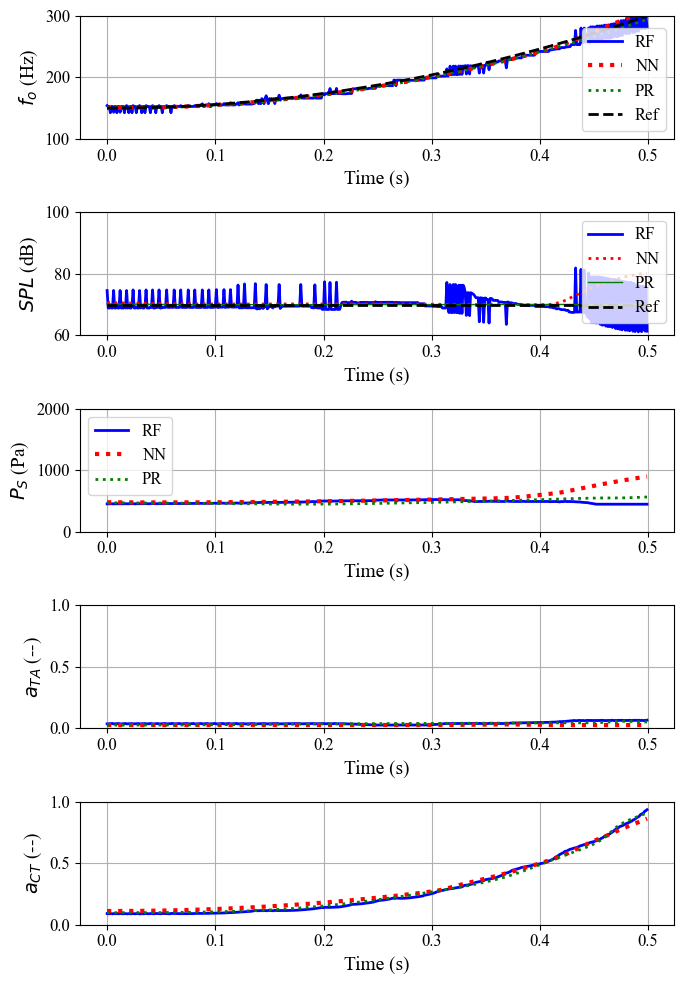

In [6]:
ges = 'fo'
# Plot resultados de las entradas
plt.figure(figsize=(7, 10))
plt.subplot(5, 1, 1)
plt.plot(t, outputHistory_RF[:, 0], 'b', linewidth=2)
plt.plot(t, outputHistory_NN[:, 0], 'r:', linewidth=3)
plt.plot(t, outputHistory_PR[:, 0], 'g:', linewidth=2)
plt.plot(t, stepRef[:, 0], 'k--', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$f_o$ (Hz)', fontsize=14)
plt.ylim([100, 300])
plt.legend(['RF', 'NN', 'PR', 'Ref'])
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(t, outputHistory_RF[:, 1], 'b', linewidth=2)
plt.plot(t, outputHistory_NN[:, 1], 'r:', linewidth=2)
plt.plot(t, outputHistory_PR[:, 1], 'g', linewidth=1)
plt.plot(t, stepRef[:, 1], 'k--', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$SPL$ (dB)', fontsize=14)
plt.ylim([60, 100])
plt.legend(['RF', 'NN', 'PR', 'Ref'])
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, inputHistory_RF[:, 2], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 2], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 2], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$P_S$ (Pa)', fontsize=14)
plt.ylim([0, 2000])
plt.legend(['RF', 'NN', 'PR'])
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(t, inputHistory_RF[:, 1], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 1], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 1], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$a_{TA}$ (--)', fontsize=14)
plt.ylim([0, 1])
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(t, inputHistory_RF[:, 0], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 0], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 0], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$a_{CT}$ (--)', fontsize=14)
plt.ylim([0, 1])
plt.grid(True)

# Ajustar los subplots para evitar superposición
plt.tight_layout()

# Show the plot
output_filename = 'Figs/GlideT_'+ges+'_low.svg'
plt.savefig(output_filename, format='svg')

plt.show()

In [12]:
# --- Ejemplo de uso con diferentes modelos ---

# Parámetros generales
Fs = 1000
numSteps = 500
alpha = 0.1
gamma = 0.1
epsilon = 0.02

nStep = 500

dt = 1 / Fs
t = np.arange(0, nStep) * dt

# fo reference
x = np.linspace(0, 1, nStep)  
fo_ref = 150 + (300 - 150) * x**2
# spl reference
spl_ref = np.full(nStep, 70)

# Crear la referencia completa con SPL constante
stepRef = np.column_stack([fo_ref, spl_ref])

#inital point
ini = [0.8,0.8,0.8]

# Realizar seguimiento con diferentes modelos
# Random Forest
inputHistory_RF, outputHistory_RF, errorHistory_RF, t_RF = realizar_seguimiento(lambda x: evalua_rf(modelRF, x), Fs, stepRef, x_scaler, start=ini)

# Red Neuronal (Keras)
inputHistory_NN, outputHistory_NN, errorHistory_NN, t_NN = realizar_seguimiento(lambda x: evalua_nn(modelNN, x), Fs, stepRef, x_scaler, start=ini)

# Polynomial Regressor (con transformación polinómica)
inputHistory_PR, outputHistory_PR, errorHistory_PR, t_PR = realizar_seguimiento(lambda x: evalua_pr(modelPR, x, poly), Fs, stepRef, x_scaler, start=ini)

Progreso: 550/550 (100.00%)

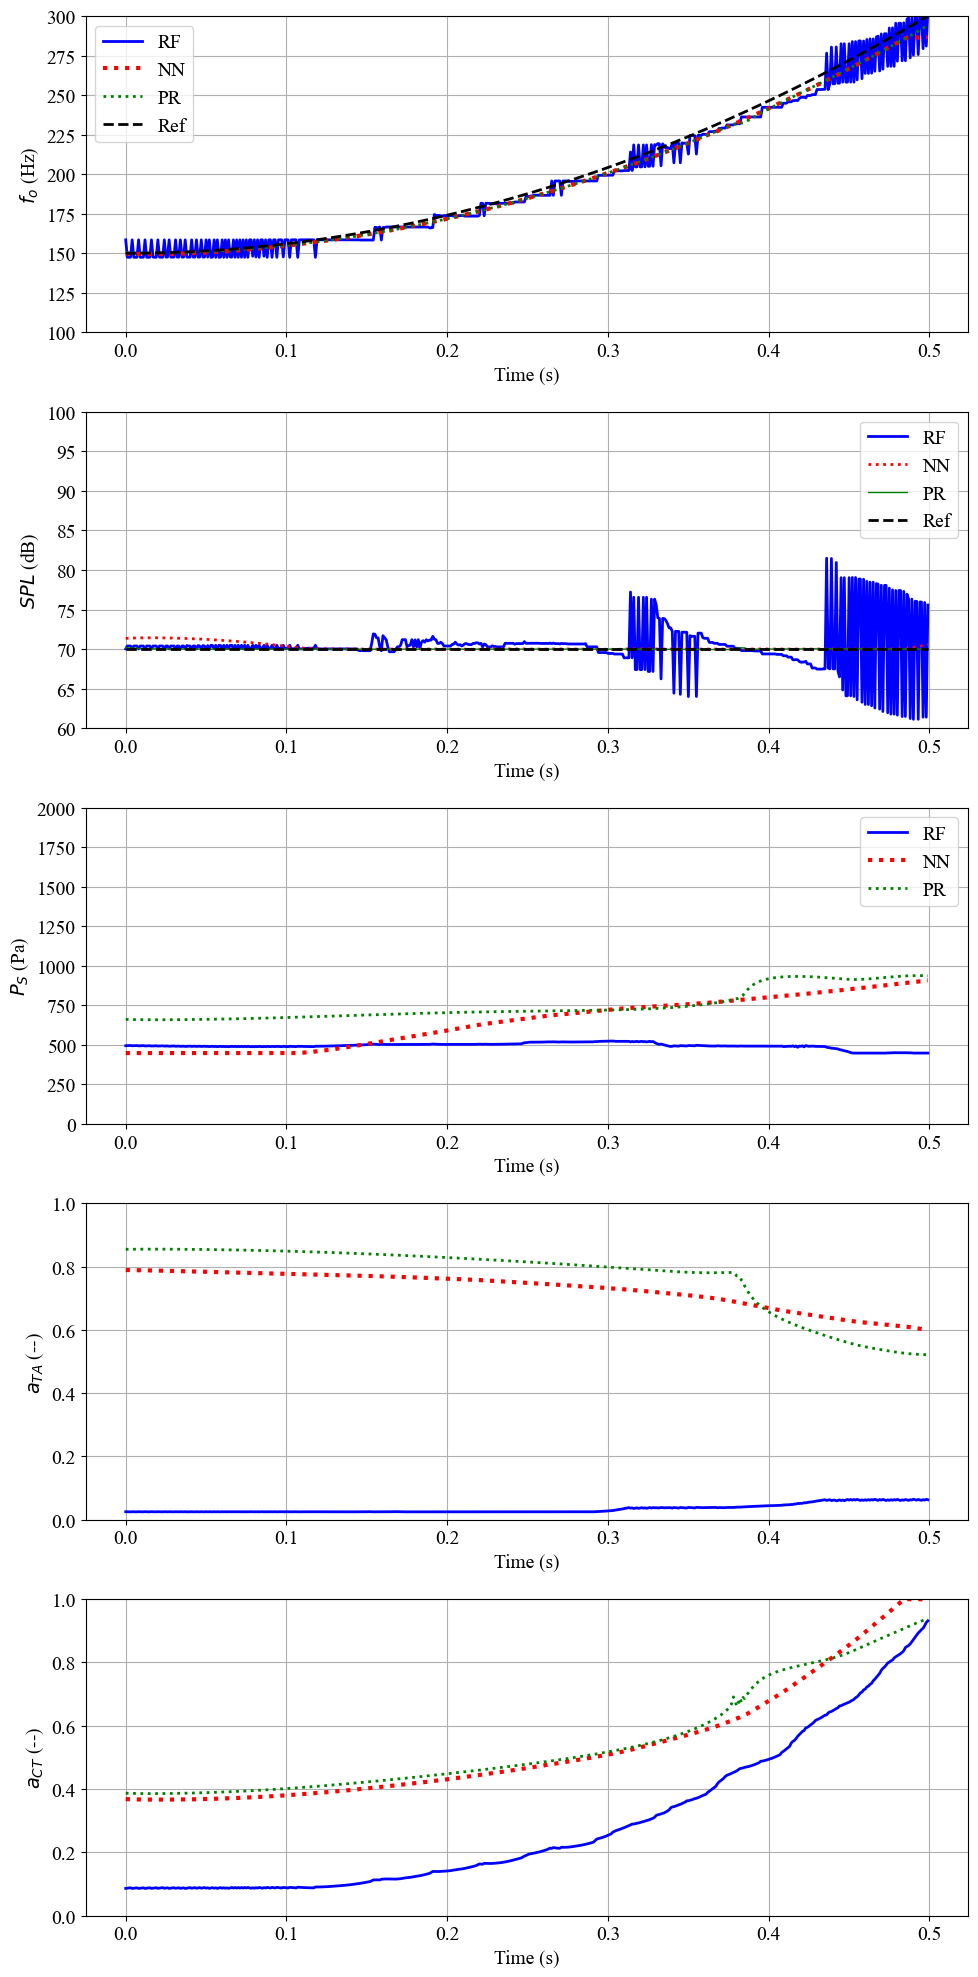

In [13]:
ges = 'fo'
# Plot resultados de las entradas
plt.figure(figsize=(14, 20))
plt.subplot(5, 1, 1)
plt.plot(t, outputHistory_RF[:, 0], 'b', linewidth=2)
plt.plot(t, outputHistory_NN[:, 0], 'r:', linewidth=3)
plt.plot(t, outputHistory_PR[:, 0], 'g:', linewidth=2)
plt.plot(t, stepRef[:, 0], 'k--', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$f_o$ (Hz)', fontsize=14)
plt.ylim([100, 300])
plt.legend(['RF', 'NN', 'PR', 'Ref'])
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(t, outputHistory_RF[:, 1], 'b', linewidth=2)
plt.plot(t, outputHistory_NN[:, 1], 'r:', linewidth=2)
plt.plot(t, outputHistory_PR[:, 1], 'g', linewidth=1)
plt.plot(t, stepRef[:, 1], 'k--', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$SPL$ (dB)', fontsize=14)
plt.ylim([60, 100])
plt.legend(['RF', 'NN', 'PR', 'Ref'])
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, inputHistory_RF[:, 2], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 2], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 2], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$P_S$ (Pa)', fontsize=14)
plt.ylim([0, 2000])
plt.legend(['RF', 'NN', 'PR'])
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(t, inputHistory_RF[:, 1], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 1], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 1], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$a_{TA}$ (--)', fontsize=14)
plt.ylim([0, 1])
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(t, inputHistory_RF[:, 0], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 0], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 0], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$a_{CT}$ (--)', fontsize=14)
plt.ylim([0, 1])
plt.grid(True)

# Ajustar los subplots para evitar superposición
plt.tight_layout()

# Show the plot
output_filename = 'Figs/GlideT_'+ges+'_high.svg'
plt.savefig(output_filename, format='svg')

plt.show()

## SPL glide

In [7]:
# --- Ejemplo de uso con diferentes modelos ---

# Parámetros generales
Fs = 1000
numSteps = 500
alpha = 0.1
gamma = 0.1
epsilon = 0.02

nStep = 500

dt = 1 / Fs
t = np.arange(0, nStep) * dt

# Referencia para seguir
stepRef = np.column_stack([np.full(numSteps, 200), np.linspace(75, 110, numSteps)])

#inital point
ini = [0.1,0.1,0.1]

# Realizar seguimiento con diferentes modelos
# Random Forest
inputHistory_RF, outputHistory_RF, errorHistory_RF, t_RF = realizar_seguimiento(lambda x: evalua_rf(modelRF, x), Fs, stepRef, x_scaler, start=ini)

# Red Neuronal (Keras)
inputHistory_NN, outputHistory_NN, errorHistory_NN, t_NN = realizar_seguimiento(lambda x: evalua_nn(modelNN, x), Fs, stepRef, x_scaler, start=ini)

# Polynomial Regressor (con transformación polinómica)
inputHistory_PR, outputHistory_PR, errorHistory_PR, t_PR = realizar_seguimiento(lambda x: evalua_pr(modelPR, x, poly), Fs, stepRef, x_scaler, start=ini)

Progreso: 550/550 (100.00%)

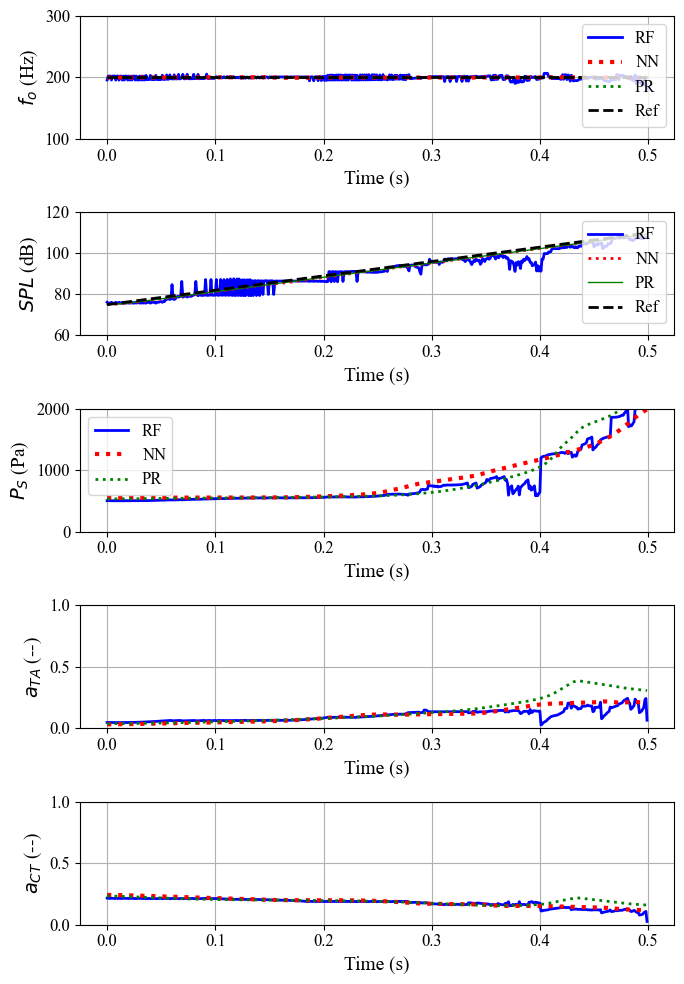

In [8]:
ges = 'spl'
# Plot resultados de las entradas
plt.figure(figsize=(7, 10))
plt.subplot(5, 1, 1)
plt.plot(t, outputHistory_RF[:, 0], 'b', linewidth=2)
plt.plot(t, outputHistory_NN[:, 0], 'r:', linewidth=3)
plt.plot(t, outputHistory_PR[:, 0], 'g:', linewidth=2)
plt.plot(t, stepRef[:, 0], 'k--', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$f_o$ (Hz)', fontsize=14)
plt.ylim([100, 300])
plt.legend(['RF', 'NN', 'PR', 'Ref'])
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(t, outputHistory_RF[:, 1], 'b', linewidth=2)
plt.plot(t, outputHistory_NN[:, 1], 'r:', linewidth=2)
plt.plot(t, outputHistory_PR[:, 1], 'g', linewidth=1)
plt.plot(t, stepRef[:, 1], 'k--', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$SPL$ (dB)', fontsize=14)
plt.ylim([60, 120])
plt.legend(['RF', 'NN', 'PR', 'Ref'])
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, inputHistory_RF[:, 2], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 2], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 2], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$P_S$ (Pa)', fontsize=14)
plt.ylim([0, 2000])
plt.legend(['RF', 'NN', 'PR'])
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(t, inputHistory_RF[:, 1], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 1], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 1], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$a_{TA}$ (--)', fontsize=14)
plt.ylim([0, 1])
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(t, inputHistory_RF[:, 0], 'b', linewidth=2)
plt.plot(t, inputHistory_NN[:, 0], 'r:', linewidth=3)
plt.plot(t, inputHistory_PR[:, 0], 'g:', linewidth=2)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('$a_{CT}$ (--)', fontsize=14)
plt.ylim([0, 1])
plt.grid(True)

# Ajustar los subplots para evitar superposición
plt.tight_layout()

# Show the plot
output_filename = 'Figs/GlideT_'+ges+'_low.svg'
plt.savefig(output_filename, format='svg')

plt.show()